## Lab 1 - Bézier Curves

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

%matplotlib inline

### Task 1: Define a function to evaluate Bernstein Polynomials

In [2]:
def bernsteinPoly(t,i,n):
    """
    This function evaluates the 'i'-th basis Bernstein Polynomial of order 'n' at the value 't'.
    """
    binomCoeff = scipy.special.binom(n,i)
    return binomCoeff * (t**i) * ((1-t)**(n-i))

#### Plotting Quadratic Bernstein Polynomials

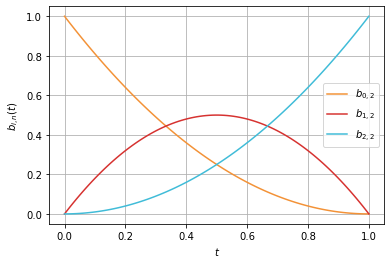

In [3]:
plt.figure(1)
plt.clf

t = np.linspace(0,1,100)
c = ["#F39237","#D63230","#40BCD8","#944BBB","#16C172", "#8DE969","#FF2C55","#B744B8"]

order = 2

for i in range(0,order+1):
    l = "$b_{"+str(i)+","+str(order)+"}$"
    plt.plot(t, bernsteinPoly(t,i,order), label=l, color=c[i % len(c)])

plt.legend()
plt.grid(1)
plt.xlabel("$t$")
plt.ylabel("$b_{i,n}(t)$")

plt.savefig('quadratic_bernstein.jpg')


#### Plotting Cubic Bernstein Polynomials

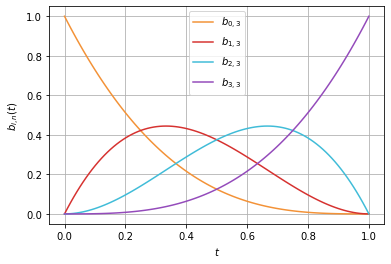

In [4]:
plt.figure(2)
plt.clf

t = np.linspace(0,1,100)
c = ["#F39237","#D63230","#40BCD8","#944BBB","#16C172", "#8DE969","#FF2C55","#B744B8"]

order = 3

for i in range(0,order+1):
    l = "$b_{"+str(i)+","+str(order)+"}$"
    plt.plot(t, bernsteinPoly(t,i,order), label=l, color=c[i % len(c)])

plt.legend()
plt.grid(1)
plt.xlabel("$t$")
plt.ylabel("$b_{i,n}(t)$")

plt.savefig('cubic_bernstein.jpg')


#### Plotting Higer Order Bernstein Polynomials

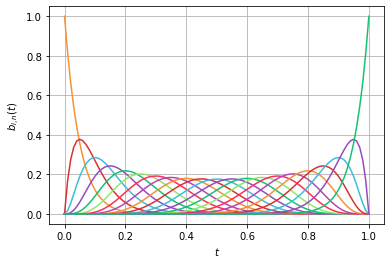

In [5]:
plt.figure(3)
plt.clf

t = np.linspace(0,1,100)
c = ["#F39237","#D63230","#40BCD8","#944BBB","#16C172", "#8DE969","#FF2C55","#B744B8"]

order = 20

for i in range(0,order+1):
    l = "$b_{"+str(i)+","+str(order)+"}$"
    plt.plot(t, bernsteinPoly(t,i,order), label=l, color=c[i % len(c)])

#plt.legend()
plt.grid(1)
plt.xlabel("$t$")
plt.ylabel("$b_{i,n}(t)$")

plt.savefig('higher2_bernstein.jpg')


### Task 2: Create a function to compute a Bézier Curve

In [6]:
def bezierCurve(t,controlPoints):
    '''
    This function calculate the Beziér Curve coordinates given the list of parameters 't' and the 'controlPoints' of the curve.
    '''
    order = len(controlPoints)-1
    
    x_results = []
    y_results = []
    
    for t_val in t:
        x_sum = 0
        y_sum = 0
        for i in range(0,order+1):
            control_x = controlPoints[i][0]
            control_y = controlPoints[i][1]
            x_sum += bernsteinPoly(t_val,i,order)*control_x
            y_sum += bernsteinPoly(t_val,i,order)*control_y
        x_results.append(x_sum)
        y_results.append(y_sum)  
    
    return [x_results,y_results]
    

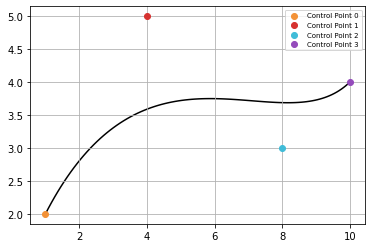

In [7]:
plt.figure(4)
plt.clf


controlPoints = [[1,2], [4,5], [8,3],[10,4]]

axes = plt.axes(label=3)
# axes.set_xlim(0,9)
# axes.set_ylim(0,6)

plt.grid(1,zorder=0)

t = np.linspace(0,1,100)
curve = bezierCurve(t,controlPoints)

plt.plot(curve[0],curve[1], color="#000000", zorder=1)

for i in range(0,len(controlPoints)):
    l = "Control Point "+str(i)
    plt.scatter(controlPoints[i][0],controlPoints[i][1],color=c[i%len(c)],zorder=2, label=l)
    
plt.legend(prop={'size': 7})
    
plt.savefig('bezierCurve.jpg')
